In [1]:
import pandas as pd

In [2]:
def remove_zero_vp_proposals(all_votes_df):
    vp_sum_df = all_votes_df.groupby('proposal')['vp'].sum() 
    zero_vp_proposals = vp_sum_df[vp_sum_df==0].index
    all_votes_df = all_votes_df[~all_votes_df['proposal'].isin(zero_vp_proposals)]
    return all_votes_df

In [37]:
all_votes_df = pd.read_json('all_votes_df.json')

In [4]:
#all_votes_df

# Proposals DF

In [5]:
proposals_df = pd.read_json('proposal_df.json')

In [8]:
proposals_df.head()

,proposal_id,title,body,choices,scores,scores_total,votes
0,0x940fea8c7965da18b12fc6a081478204d41cda975ca8...,IIP-105 DG1: Launch MATIC 2x Flexible Leverage...,This is the first of two votes required for a ...,"[FOR, AGAINST]","[335666.8629166403, 147.0129557]",335813.875872,63
1,0x31a11f7f37c0319785cad3ab7353745731c3d33908b5...,IIP-104 DG1: Launch ETH2X-FLI (Polygon),This is the first of two votes required for a ...,"[FOR, AGAINST]","[336157.5620030734, 0]",336157.562003,66
2,0xc6735f6bba6dc6ba537077d08f4db0bf3695ec1086dd...,"IIP-95: Beta Finance - DPI, MVI, BED & ETH2x-F...",Status: Proposal\nAuthor: Matthew Graham (@Mat...,"[FOR, AGAINST]","[311488.4897019716, 20298.2561988228]",331786.745901,59
3,0x40edf5d2828a0473626a8a7bfa22a8755fb847a95563...,IIP-103 DG1: Launch Token Terminal Smart Beta ...,This is the first of two votes required for a ...,"[FOR, AGAINST]","[296583.7549959282, 0]",296583.754996,57
4,0xf617a54ce920d92e800bc8137367c97662446f5fc6e1...,[BALANCER] Treasury Swap: Balancer DAO <> Fei DAO,This proposal is for voting on BALANCER's newe...,"[Yes, No]","[51789.8184675761, 0]",51789.818468,28


In [11]:
proposals_df['percentage_for'] =proposals_df['scores'].map(lambda x: x[0])/proposals_df['scores_total']


In [17]:
import matplotlib.pyplot as plt

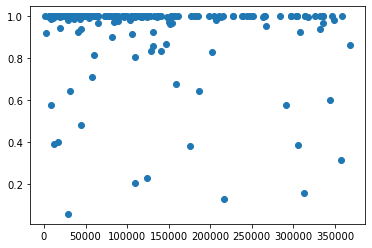

In [21]:
plt.scatter(proposals_df['scores_total'],proposals_df['percentage_for'])

In [30]:
#proposals_df.sort_values(by='votes',ascending=False)

In [43]:
proposals_df = proposals_df[proposals_df['percentage_for']!=1]

In [44]:
proposals_df

,proposal_id,title,body,choices,scores,scores_total,votes,percentage_for
0,0x940fea8c7965da18b12fc6a081478204d41cda975ca8...,IIP-105 DG1: Launch MATIC 2x Flexible Leverage...,This is the first of two votes required for a ...,"[FOR, AGAINST]","[335666.8629166403, 147.0129557]",335813.875872,63,0.999562
2,0xc6735f6bba6dc6ba537077d08f4db0bf3695ec1086dd...,"IIP-95: Beta Finance - DPI, MVI, BED & ETH2x-F...",Status: Proposal\nAuthor: Matthew Graham (@Mat...,"[FOR, AGAINST]","[311488.4897019716, 20298.2561988228]",331786.745901,59,0.938821
7,QmV1AkcZ2oJYDzPUGkdevE4NvBSAHoQwAkRV7ytFJyEUzg,[AAVE-45] Risk Parameter Updates 2021-11-04,This proposal is for voting on Aave's proposal...,"[For, Against]","[17992.8701975735, 1031.2143363543]",19024.084534,22,0.945794
8,0x6e77a0e6d1fd3f2b73df0e4dad1df2daf17279370397...,IIP-71 DG2: Launching the Robot Index ($iRobot),Decision Gate 2 is the final vote for onboardi...,"[FOR , AGAINST]","[49512.7928279456, 263429.9101891638]",312942.703017,76,0.158217
9,0x26ea01b07411488227517a164bdfa5ee5c06792bd976...,IIP-101: Authorize the Operations Account for ...,Status: Proposed\nAuthor: @Finance.Nest \nCrea...,"[FOR, AGAINST]","[284541.5135567146, 22796.8100345299]",307338.323591,54,0.925825
...,...,...,...,...,...,...,...,...
182,QmPnF5pxsLKS9i3KdNpVtqQcLYcYoDCYM5ocYGmYKw8hrU,[UNISWAP-3] https://snapshot.page/#/uniswap/pr...,This proposal is for voting on Uniswap's propo...,"[For, Against]","[116522.5619666844, 186.8301531906]",116709.392120,73,0.998399
183,QmSSZzLPbLpegBWfxPBTVAdvUZoXAL2V6Hi58YHEi6bemW,IIP-7 CoinShares Gold and Cryptoassets Index L...,## Simple Summary\n\nThe CoinShares Gold and C...,"[FOR, AGAINST]","[207237.6314297594, 136489.5390568919]",343727.170487,93,0.602913
184,QmethJXKnCMd89wWBaxCBRcK2Hu8Dhx5E5AM7XeHEKsL1n,[COMPOUND-32] Distribute COMP to Affected User...,This proposal is for voting on Compound's prop...,"[For, Against]","[67189.5246969847, 108859.8790477343]",176049.403745,77,0.381652
185,QmTdYHoyT5eLWSZduHkivVxs3Vree1EUQUYCk8uoW4Q1EA,[COMPOUND-31] Adjusting Reserve Factors,This proposal is for voting on Compound's prop...,"[For, Against]","[108963.725910139, 0.010909579]",108963.736820,45,1.000000


In [42]:
pd.merge(all_votes_df,proposals_df,left_on='proposal',right_on='proposal_id',how='left').head()

,vote_id,ipfs,voter,created,space,proposal,choice,vp,vp_by_strategy,vp_state,proposal_id,title,body,choices,scores,scores_total,votes,percentage_for
0,0x4c35589e3b6c3d21ef953a45706e4521d281116ab7be...,QmPoR2Pb2FxNA85ymWmSR1B63SvkYxXsTqf6iWt5nRRPvr,0xaAa604E8f5318373D1785766D4f7310AF6CC4891,1637255405000,index-coop.eth,0x940fea8c7965da18b12fc6a081478204d41cda975ca8...,1,22950.433092,"[0, 22950.4330921088]",final,0x940fea8c7965da18b12fc6a081478204d41cda975ca8...,IIP-105 DG1: Launch MATIC 2x Flexible Leverage...,This is the first of two votes required for a ...,"[FOR, AGAINST]","[335666.8629166403, 147.0129557]",335813.875872,63.0,0.999562
1,0x610b571fa3bfc27980f68ecc18718a89a0c687157079...,QmcTZciba6W2tkGzXYho2ieECojtHxWpehmf8Qg8pxrr25,0x9829C7157889EE198cBc40208a8ABb29b3Ad2A2d,1637254465000,index-coop.eth,0x940fea8c7965da18b12fc6a081478204d41cda975ca8...,1,200.000000,"[200, 0]",final,0x940fea8c7965da18b12fc6a081478204d41cda975ca8...,IIP-105 DG1: Launch MATIC 2x Flexible Leverage...,This is the first of two votes required for a ...,"[FOR, AGAINST]","[335666.8629166403, 147.0129557]",335813.875872,63.0,0.999562
2,0xe716442936922d7c664e35b822b19e6fd95992d0cc60...,QmZ9TeP4GMHRtZNm2KaTjGJPNyi4BvLwG53Bc7WZftMrLh,0xBd31D988151DE348C928254D5622148Fdf7AF73C,1637251811000,index-coop.eth,0x940fea8c7965da18b12fc6a081478204d41cda975ca8...,1,6313.927416,"[6313.9274159834, 0]",final,0x940fea8c7965da18b12fc6a081478204d41cda975ca8...,IIP-105 DG1: Launch MATIC 2x Flexible Leverage...,This is the first of two votes required for a ...,"[FOR, AGAINST]","[335666.8629166403, 147.0129557]",335813.875872,63.0,0.999562
3,0xfc7ea7360964d40f8d1b48a7fcc38bba2e8e92e93440...,QmNg7wwudkAwzbVhyySz5U2vAVGng3ASAB55axykSb5tcz,0x4F4538e2553C61BCE747f73C5fE8133D4B383Dda,1637248363000,index-coop.eth,0x940fea8c7965da18b12fc6a081478204d41cda975ca8...,1,465.225939,"[465.2259387605, 0]",final,0x940fea8c7965da18b12fc6a081478204d41cda975ca8...,IIP-105 DG1: Launch MATIC 2x Flexible Leverage...,This is the first of two votes required for a ...,"[FOR, AGAINST]","[335666.8629166403, 147.0129557]",335813.875872,63.0,0.999562
4,0x3faf87b652187d4614fe28eaafa91532bea119941574...,QmPtXXoyyYrKPRRuDB9d4coRKw1r2Gm8vXgTufc6EEqoys,0x37B2691f9129a879913C5775307bEF89A77815D4,1637247438000,index-coop.eth,0x940fea8c7965da18b12fc6a081478204d41cda975ca8...,1,693.016741,"[693.0167413626, 0]",final,0x940fea8c7965da18b12fc6a081478204d41cda975ca8...,IIP-105 DG1: Launch MATIC 2x Flexible Leverage...,This is the first of two votes required for a ...,"[FOR, AGAINST]","[335666.8629166403, 147.0129557]",335813.875872,63.0,0.999562


# Kingmaker